<a href="https://colab.research.google.com/github/bab81/AI-Algorithms/blob/main/25_Feature_Transformation_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#What is PCA?

Downloading...
From: https://drive.google.com/uc?id=1RSO0EWJ9uy-M6gqRHcfQaoiIg_98bott
To: /content/PCA.jpg
100% 156k/156k [00:00<00:00, 79.6MB/s]


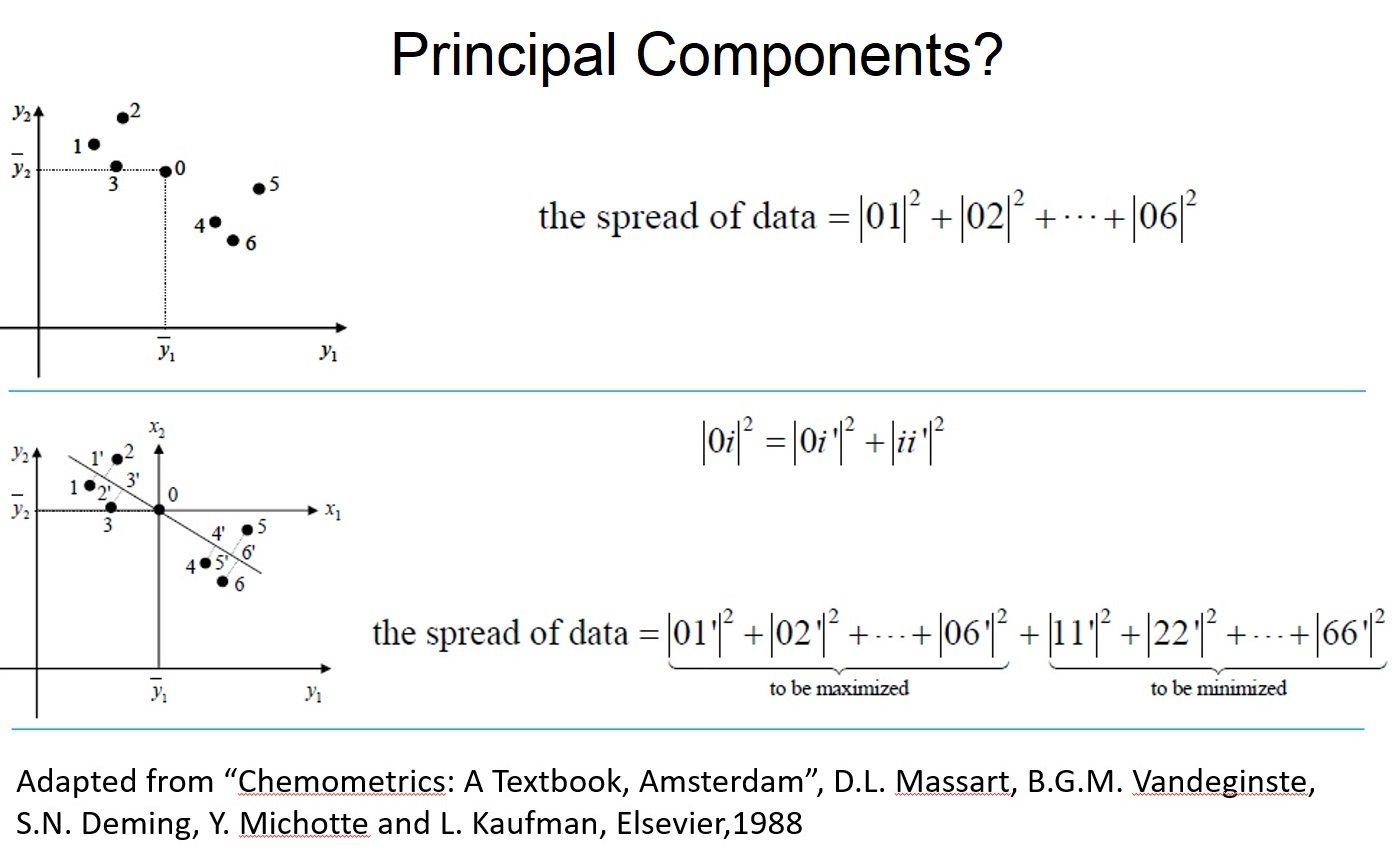

In [2]:
!gdown 1RSO0EWJ9uy-M6gqRHcfQaoiIg_98bott
from IPython import display
display.Image("PCA.jpg")

##PCA Example

###Generating Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

from sklearn.datasets import make_blobs

from sklearn.metrics  import classification_report,confusion_matrix,ConfusionMatrixDisplay

In [4]:
x,y=make_blobs(500, 3,centers=3,random_state=11)
df=pd.DataFrame(x)
df['L']=y
df

,0,1,2,L
0,-5.641964,-8.502473,1.423229,0
1,-5.666508,-9.708367,-1.029044,0
2,-9.149787,-0.145457,7.101836,2
3,-6.328004,-9.454320,-0.374657,0
4,4.744411,-0.664751,-1.281863,1
...,...,...,...,...
495,5.238317,-2.561665,-0.521744,1
496,-8.280651,1.109482,7.232434,2
497,-9.842527,-0.591954,9.274752,2
498,-7.452285,-9.797216,-0.954219,0


3D Plotting:

https://plotly.com/python/3d-scatter-plots/#basic-3d-scatter-plot

In [5]:
import plotly.express as px
fig = px.scatter_3d(df, x=0, y=1, z=2,
              color='L')
fig.show()

###PCA Feature Transformation

In [6]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(df[[0,1,2]])
df_PCA = pca.transform(df[[0,1,2]]) #tranform produced a numpy array
df_PCA=pd.DataFrame(df_PCA)
df_PCA['L']=df['L']

In [7]:
df_PCA

,0,1,2,L
0,-0.392134,4.963605,1.319963,0
1,1.049560,7.047569,0.296712,0
2,-7.220687,-2.932138,-1.007956,2
3,0.116722,6.806940,0.344134,0
4,8.968453,-4.161863,-1.073667,1
...,...,...,...,...
495,9.141905,-3.176556,0.775412,1
496,-6.690619,-4.337440,-1.310408,2
497,-8.946759,-3.284197,0.507809,2
498,-0.465551,7.783106,-0.308196,0


In [8]:
import plotly.express as px
fig = px.scatter_3d(df_PCA, x=0, y=1, z=2,
              color='L')
fig.show()

In [ ]:
pca.explained_variance_ratio_

array([0.64046193, 0.34616468, 0.01337339])

<BarContainer object of 3 artists>

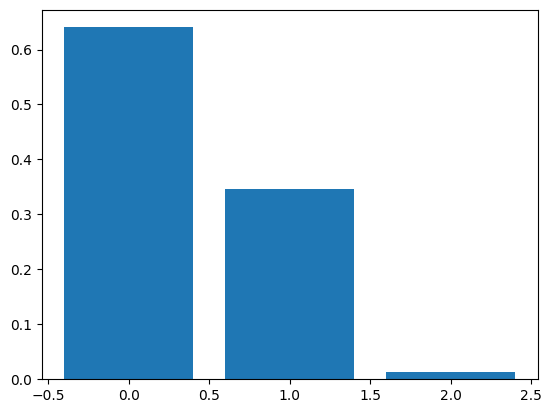

In [9]:
plt.bar([i for i in range(len(pca.explained_variance_ratio_))],pca.explained_variance_ratio_)

###Logistic Regression no PCA

In [10]:
#normalization/Data Split
X_train, X_test, Y_train, Y_test=train_test_split(StandardScaler().fit_transform(df[[0,1,2]]), df['L'], test_size=0.3, random_state=42)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       119
           1       1.00      1.00      1.00       115
           2       1.00      1.00      1.00       116

    accuracy                           1.00       350
   macro avg       1.00      1.00      1.00       350
weighted avg       1.00      1.00      1.00       350

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        52
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



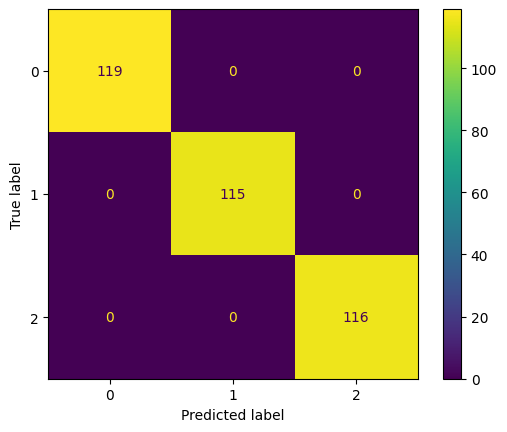

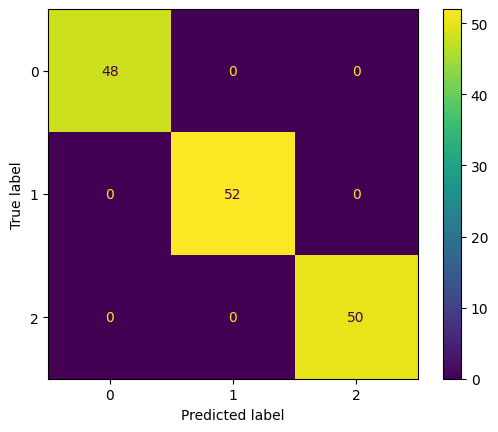

In [11]:
Model=LogisticRegression()
Model.fit(X_train,Y_train)

print(classification_report(Y_train,Model.predict(X_train)))
ConfusionMatrixDisplay(confusion_matrix(Y_train,Model.predict(X_train))).plot()
print(classification_report(Y_test,Model.predict(X_test)))
ConfusionMatrixDisplay(confusion_matrix(Y_test,Model.predict(X_test))).plot()

In [12]:
Model.coef_, Model.intercept_

(array([[-0.93566979, -1.9437725 , -0.94154681],
        [ 2.04119857,  0.97203573, -0.63659223],
        [-1.10552878,  0.97173677,  1.57813904]]),
 array([ 0.09034782,  0.03586211, -0.12620993]))

###Logistic Regression with PCA

In [13]:
pca = PCA()
pca.fit(X_train)
X_train_PCA = pca.transform(X_train)
X_test_PCA = pca.transform(X_test)

In [14]:
X_train_PCA.shape

(350, 3)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       119
           1       1.00      1.00      1.00       115
           2       1.00      1.00      1.00       116

    accuracy                           1.00       350
   macro avg       1.00      1.00      1.00       350
weighted avg       1.00      1.00      1.00       350

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        52
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



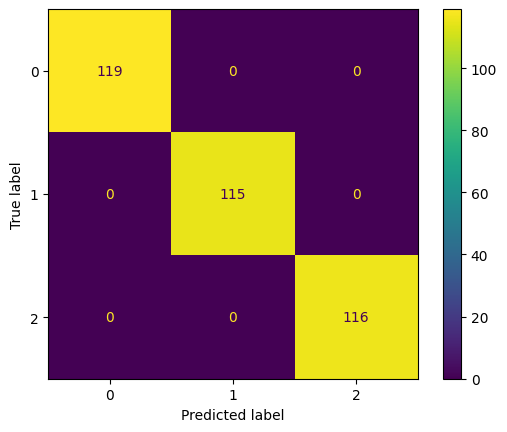

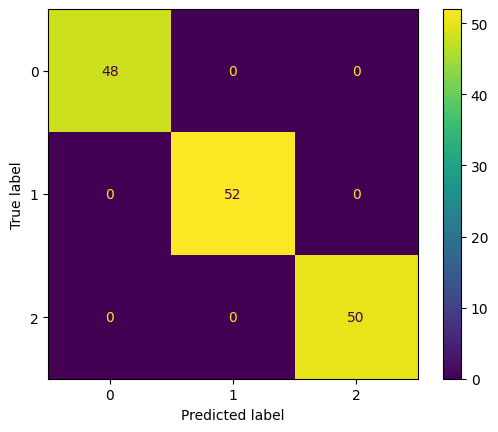

In [15]:
Model_PCA=LogisticRegression()
Model_PCA.fit(X_train_PCA[:,0:2],Y_train) #fit using only 2 features transformed through PCA

print(classification_report(Y_train,Model_PCA.predict(X_train_PCA[:,0:2])))
ConfusionMatrixDisplay(confusion_matrix(Y_train,Model_PCA.predict(X_train_PCA[:,0:2]))).plot()
print(classification_report(Y_test,Model_PCA.predict(X_test_PCA[:,0:2])))
ConfusionMatrixDisplay(confusion_matrix(Y_test,Model_PCA.predict(X_test_PCA[:,0:2]))).plot()

In [16]:
Model_PCA.coef_, Model_PCA.intercept_

(array([[-1.13675446,  2.0619348 ],
        [-1.02080307, -2.11620471],
        [ 2.15755754,  0.05426991]]),
 array([ 0.11841614,  0.00842414, -0.12684028]))

##Test PCA on MNIST

###Load MNIST Dataset

http://yann.lecun.com/exdb/mnist/

In [ ]:
from keras.datasets import mnist as ks_mnist
(x_train, y_train), (x_test, y_test) = ks_mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
x_train[0].shape

(28, 28)

In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

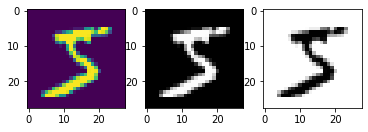

In [ ]:
plt.subplot(1,3,1)
plt.imshow(x_train[0])
plt.subplot(1,3,2)
plt.imshow(x_train[0],cmap='gray')
plt.subplot(1,3,3)
plt.imshow(abs(255-x_train[0]),cmap='gray')

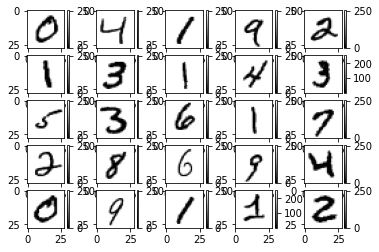

In [ ]:
for i in range(1,26):
  plt.subplot(5,5,i)
  plt.imshow(abs(255-x_train[i]),cmap='gray')
  plt.colorbar()

In [ ]:
x_train.reshape(60000,28*28) #784 features for each image!!

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

###Logistic Regression

<font color='red'>Do not run the following block! It will take a long time </font>

In [ ]:
#It will take a long time?!
Model_MNIST_Linear=LogisticRegression(max_iter=1000,solver='liblinear')
Model_MNIST_Linear.fit(x_train.reshape(60000,28*28),y_train)

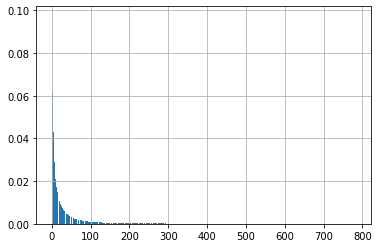

In [ ]:
pca_mnist = PCA()
pca_mnist.fit(x_train.reshape(60000,28*28))
x_train_PCA = pca_mnist.transform(x_train.reshape(60000,28*28))
x_test_PCA = pca_mnist.transform(x_test.reshape(10000,28*28))

plt.bar([i for i in range(len(pca_mnist.explained_variance_ratio_))],pca_mnist.explained_variance_ratio_)
plt.grid()

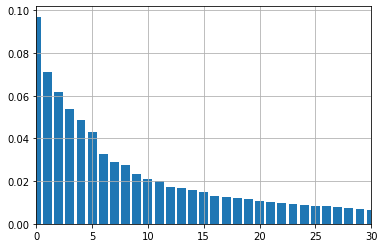

In [ ]:
plt.bar([i for i in range(len(pca_mnist.explained_variance_ratio_))],pca_mnist.explained_variance_ratio_)
plt.xlim([0,30])
plt.grid()

In [ ]:
np.sum(pca_mnist.explained_variance_ratio_[0:15])

0.5793373196389915

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      5923
           1       0.88      0.96      0.92      6742
           2       0.82      0.80      0.81      5958
           3       0.76      0.80      0.78      6131
           4       0.81      0.82      0.81      5842
           5       0.73      0.61      0.66      5421
           6       0.86      0.89      0.88      5918
           7       0.85      0.88      0.86      6265
           8       0.79      0.76      0.78      5851
           9       0.73      0.67      0.70      5949

    accuracy                           0.82     60000
   macro avg       0.81      0.81      0.81     60000
weighted avg       0.81      0.82      0.81     60000

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       980
           1       0.92      0.96      0.94      1135
           2       0.83      0.80      0.81      1032
           3       0.77 

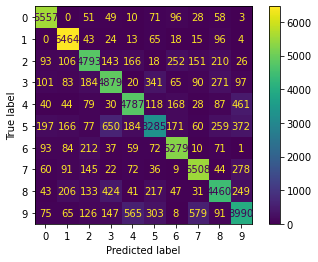

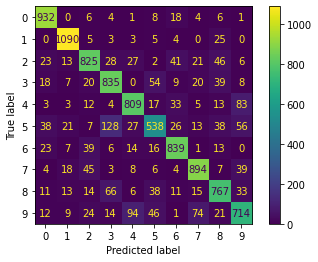

In [ ]:
Number_Features=15

Model_MNIST_Linear_PCA=LogisticRegression(max_iter=1000,solver='liblinear')
Model_MNIST_Linear_PCA.fit(x_train_PCA[:,0:Number_Features],y_train)


print(classification_report(y_train,Model_MNIST_Linear_PCA.predict(x_train_PCA[:,0:Number_Features])))
print(classification_report(y_test,Model_MNIST_Linear_PCA.predict(x_test_PCA[:,0:Number_Features])))
ConfusionMatrixDisplay(confusion_matrix(y_train,Model_MNIST_Linear_PCA.predict(x_train_PCA[:,0:Number_Features]))).plot()
ConfusionMatrixDisplay(confusion_matrix(y_test,Model_MNIST_Linear_PCA.predict(x_test_PCA[:,0:Number_Features]))).plot()

# Remarks

1.   Should we use PCA all the time? NO. 
>Maximum Variance may not give us the best direction we want
>PCA tries to transform the data without looking at the label
>Even the least important PCs may have something important to say!
2.   PCA vs MLP transformer
>PCA is a linear transformation but MLP is non-linear so MLP is more powerful theoretically
>Training MLP is more challenging than finding PCs

